In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import os

In [2]:
basePath = '../measurements/'
df = pd.read_csv(basePath+'1_Octree_maxDepth_10_maxInLeaf_4_w_duplicates_response_on.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaft','totalLeafElements'])
nrange = range(len(df))


In [3]:
# df.groupby('count').mean().index

In [42]:
def plot(dataframe, xstr, ystr, xlabel, ylabel, figname, 
         xlimUpper=None,  ylimUpper=None, title=None, dataframe2=None, label1=None, label2=None, xticksrot=0, drawLinear=True):
    if xstr == 'index':
        # dont group by, just plot ystr
        xdf, ydf = range(len(dataframe)), dataframe[ystr]
    else:
        dfg = dataframe.groupby(xstr).mean()
        xdf, ydf = dfg.index, dfg[ystr]
    lbl = 'uzorak' if label1 is None else label1
    plt.plot(xdf, ydf, label=lbl) #1/df['dt']*60)
    if dataframe2 is not None:
        lbl = 'uzorak' if label2 is None else label2
        if xstr == 'index':
        # dont group by, just plot ystr
            plt.plot( range(len(dataframe2)), dataframe2[ystr], label=lbl)
        else:
            plt.plot(dataframe2[xstr], dataframe2[ystr], label=lbl) 
    if title != None:
        plt.title(title)
    # plt.plot([-10, max(df['count'])], [1,1])
    if drawLinear:
        plt.plot([min(xdf), max(xdf)], [min(ydf), min(ydf) * max(xdf)/min(xdf) ], 'g--', label='linearno', alpha=0.5)
    plt.xlim(min(xdf), xlimUpper if xlimUpper is not None else max(xdf))
    if ylimUpper != None:
        plt.ylim(0, ylimUpper) #5
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xticksrot)
    plt.axhline(y=1, color='orange', alpha=0.3, label='60fps')
    plt.axhline(y=2, color='red', alpha=0.3, label='30fps')
    plt.legend()
    plt.savefig(figname + '.pdf', bbox_inches='tight')
    plt.show()


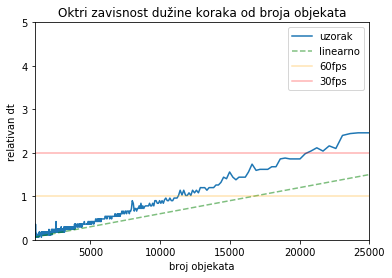

In [204]:

plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=25000, ylimUpper=5, 
     title='Oktri zavisnost dužine koraka od broja objekata', figname='oktri_dt_vs_numobj')

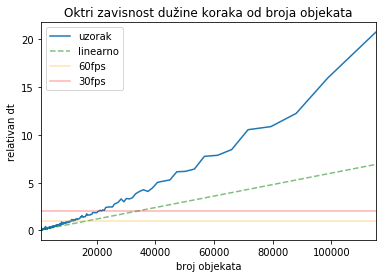

In [205]:
plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt',# xlimUpper=25000, ylimUpper=5, 
     title='Oktri zavisnost dužine koraka od broja objekata', figname='oktri_dt_vs_numobj_zoomout')

In [20]:
def moveFiguresToTexDir():
    for file in os.listdir('.'):
        if file.endswith(".pdf"):
            print('moving', file)
            dest = '../tex/figures/' + file
#             if os.path.exists(dest):
#                   os.remove(dest)
            os.rename(file, dest)


In [196]:
df1 = pd.read_csv(basePath+'Idle_drawing.csv'
                 , header=None,
                names=['dt','size','count'])
df2 = pd.read_csv(basePath+'Idle_notDrawing.csv'
                 , header=None,
                names=['dt','size','count'])

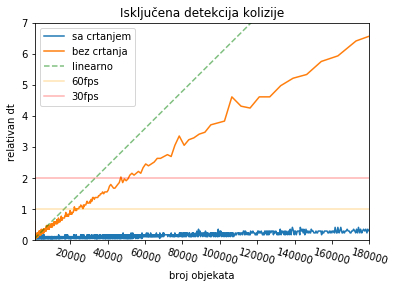

In [197]:
plot(dataframe=df2, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=180000, ylimUpper=7, 
     title='Isključena detekcija kolizije', figname='idleDrawVsNoDraw',
    dataframe2=df1, label1='sa crtanjem', label2='bez crtanja', xticksrot=-15)

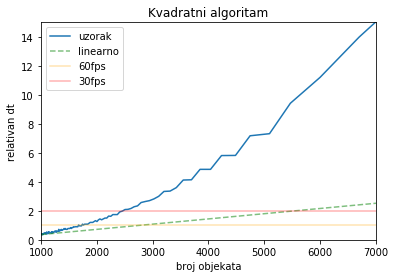

In [198]:
df = pd.read_csv(basePath+'BasicCollision.csv'
                 , header=None,
                names=['dt','size','count'])

plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=7000, ylimUpper=15, 
     title='Kvadratni algoritam', figname='basicCollision',
   )

In [59]:
moveFiguresToTexDir()

moving octreeSpikes.pdf


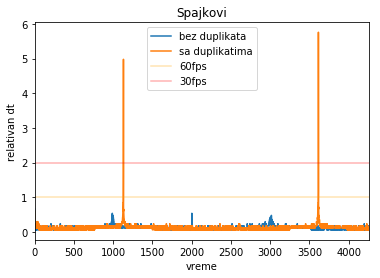

In [58]:
dfNoCollOctreeDups = pd.read_csv(basePath+'octree_duplicates_jolt.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaft','totalLeafElements'])

dfNoCollOctreeNoDups = pd.read_csv(basePath+'octree_nodups_jolt.csv'
                 , header=None,
                names=['dt','size','count', '_a','_b','_c', '_d'])

plot(dataframe=dfNoCollOctreeNoDups , xstr='index', ystr='dt', 
     xlabel='vreme', ylabel='relativan dt', #xlimUpper=7000, ylimUpper=15, 
     title='Spajkovi', figname='octreeSpikes', drawLinear=False,
    dataframe2=dfNoCollOctreeDups, label1='bez duplikata', label2='sa duplikatima'
   )